In [10]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import pickle

In [2]:
nx = 8
ny = 6

objpoints = [] #3D points of real object (x,y,z) (0,0,0) - (8,5,0)
imgpoints = [] #2D points of the chessboard image 

#prepare object points like (0,0,0)
objp = np.zeros((nx*ny,3), np.float32) # 54 3-dimensional points

#populate with coords using mgrid
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) #x,y coordinates
objp.shape

(48, 3)

detected lines for 35/36


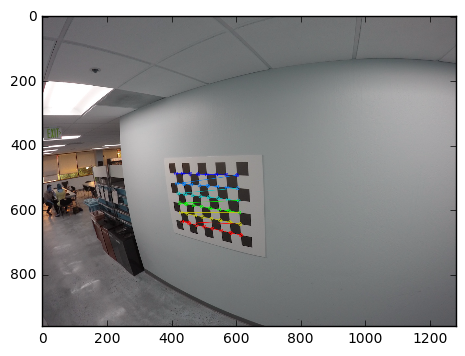

In [3]:

imagelist = glob.glob('images/GO*.JPG')

j = 0
for i in imagelist:
    img = cv2.imread(i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
  
    # If corners are found, add object points and image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)
        cv2.waitKey(500)
        j+=1
        
print("detected lines for {}/{}".format(j,len(imagelist)))
cv2.destroyAllWindows()

In [15]:
print(objpoints[7][0], imgpoints[7][0])


[ 0.  0.  0.] [[ 155.76480103  340.90032959]]


In [5]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

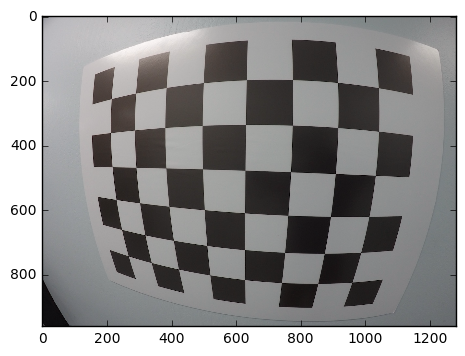

In [6]:
testimg = cv2.imread('images/GOPR0063.JPG')
plt.imshow(testimg)

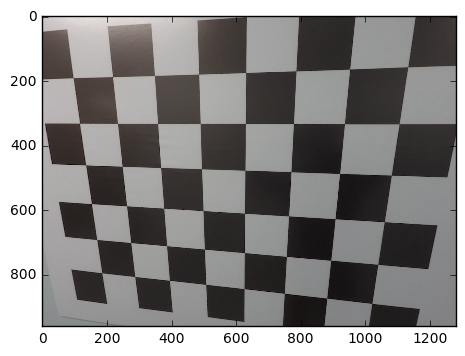

In [7]:
dst = cv2.undistort(testimg, mtx, dist, None, mtx)
plt.imshow(dst)

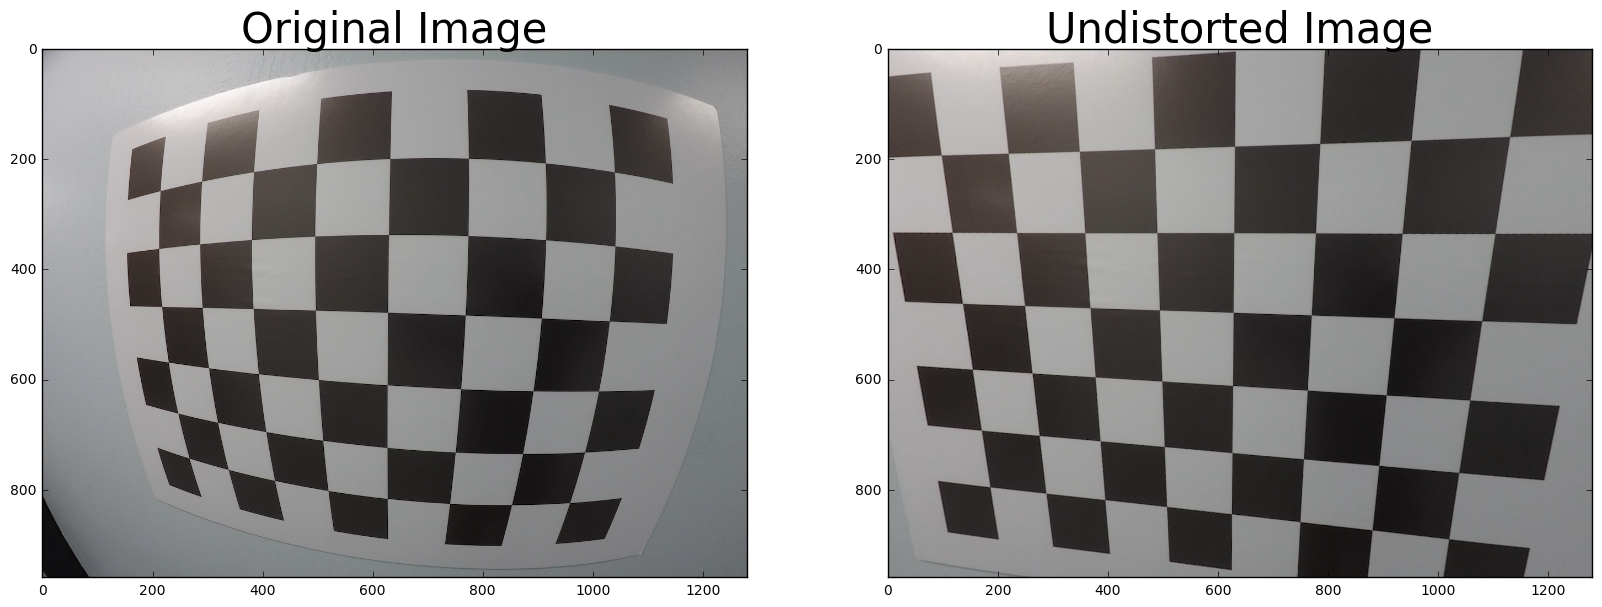

In [8]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(testimg)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [11]:

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "wide_dist_pickle.p", "wb" ) )


In [ ]:
#to load
# Read in the saved camera matrix and distortion coefficients
# These are the arrays calculated using cv2.calibrateCamera()

dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
dist = dist_pickle["dist"]
mtx = dist_pickle["mtx"]
